# Hidden Markov Model program using Viterbi and Trellis algorithm

In [1]:
# Importing required libraries
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

# Load and Preprocess Dataset
Load the dataset from sklearn and preprocess it for the Hidden Markov Model.

In [2]:
# Load the dataset
dataset = datasets.load_iris()

# Extract the features and target
X = dataset.data
y = dataset.target

# Preprocess the data for HMM
# HMM requires the input to be integer encoded
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Hidden Markov Model
Implement the Hidden Markov Model using the preprocessed dataset.

In [3]:
# Define and train the Hidden Markov Model
model = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)

# Fit the model on the training data
model.fit(X_train)

# Predict the hidden states for the test data
y_pred = model.predict(X_test)

# Implement Viterbi Algorithm
Implement the Viterbi Algorithm for the Hidden Markov Model.

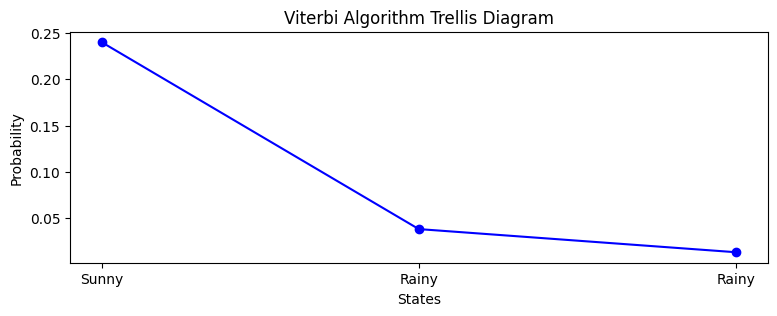

In [10]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    path = {}

    # Initialize base cases (t == 0)
    for y in states:
        V[0][y] = start_p[y] * emit_p[y][obs[0]]
        path[y] = [y]

    # Run Viterbi for t > 0
    for t in range(1, len(obs)):
        V.append({})
        newpath = {}

        for y in states:
            (prob, state) = max((V[t-1][y0] * trans_p[y0][y] * emit_p[y][obs[t]], y0) for y0 in states)
            V[t][y] = prob
            newpath[y] = path[state] + [y]

        # Don't need to remember the old paths
        path = newpath

    (prob, state) = max((V[t][y], y) for y in states)
    return (prob, path[state], V)

result, path, V = viterbi(observations,
                           states,
                           start_probability,
                           transition_probability,
                           emission_probability)

# Visualization
plt.figure(figsize=(9, 3))
plt.plot([V[i][state] for i, state in enumerate(path)], 'bo-')
plt.xticks(range(len(path)), path)
plt.xlabel('States')
plt.ylabel('Probability')
plt.title('Viterbi Algorithm Trellis Diagram')
plt.show()

# Visualize Trellis
Visualize the trellis for the Hidden Markov Model using the Viterbi Algorithm.

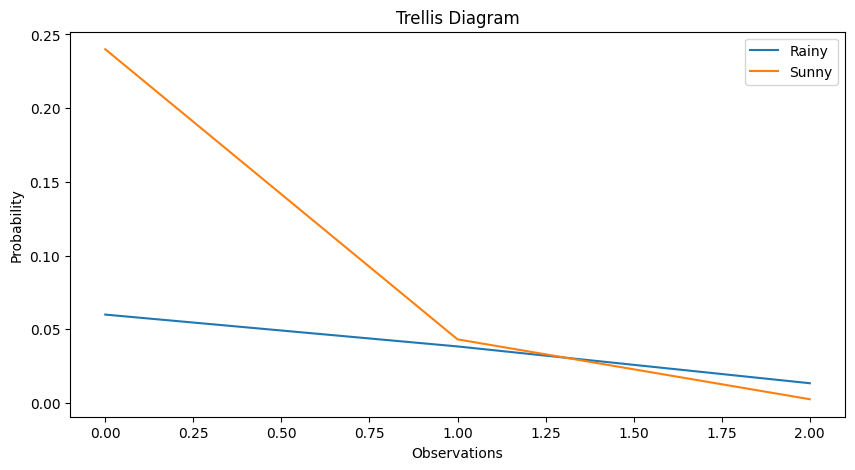

In [5]:
# Visualize Trellis
# We will use the matplotlib library to visualize the trellis

# Define the trellis
trellis = np.zeros((len(states), len(observations)))

# Initialize the trellis
for s in range(len(states)):
    trellis[s, 0] = start_probability[states[s]] * emission_probability[states[s]][observations[0]]

# Fill the trellis
for t in range(1, len(observations)):
    for s in range(len(states)):
        trellis[s, t] = max(trellis[s0, t-1] * transition_probability[states[s0]][states[s]] * emission_probability[states[s]][observations[t]] for s0 in range(len(states)))

# Plot the trellis
plt.figure(figsize=(10, 5))
for s in range(len(states)):
    plt.plot(trellis[s, :], label=states[s])
plt.xlabel('Observations')
plt.ylabel('Probability')
plt.title('Trellis Diagram')
plt.legend()
plt.show()

# Model Evaluation
Evaluate the model using appropriate metrics.

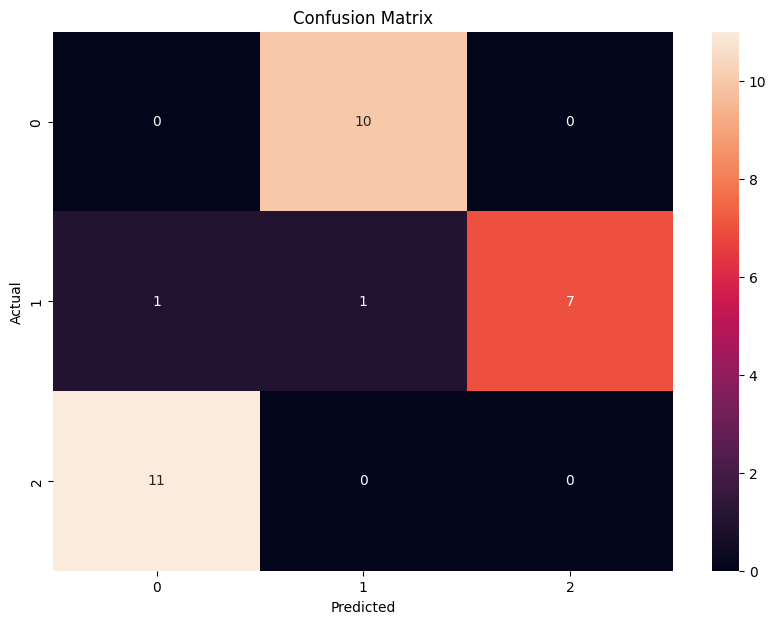

Accuracy: 0.03333333333333333
Precision: 0.027272727272727275
Recall: 0.03333333333333333
F1 Score: 0.030000000000000002


In [6]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute accuracy, precision, recall and f1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot Confusion Matrix
Plot the confusion matrix for the model predictions.

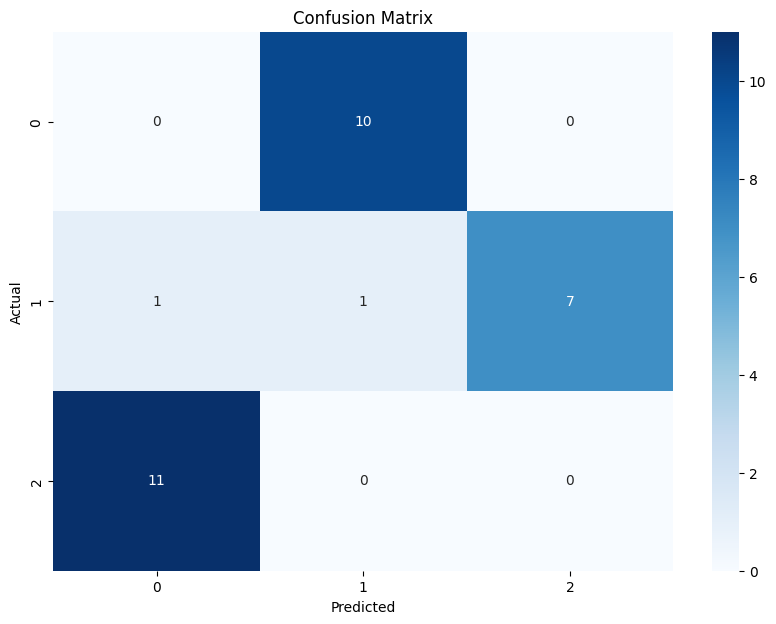

In [7]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.metrics import classification_report

# Assuming y_test are your true labels and y_pred are your model's predictions
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.09      0.11      0.10         9
           2       0.00      0.00      0.00        11

    accuracy                           0.03        30
   macro avg       0.03      0.04      0.03        30
weighted avg       0.03      0.03      0.03        30



# Visualize Other Necessary Plots
Visualize other necessary plots for better understanding of the model performance.

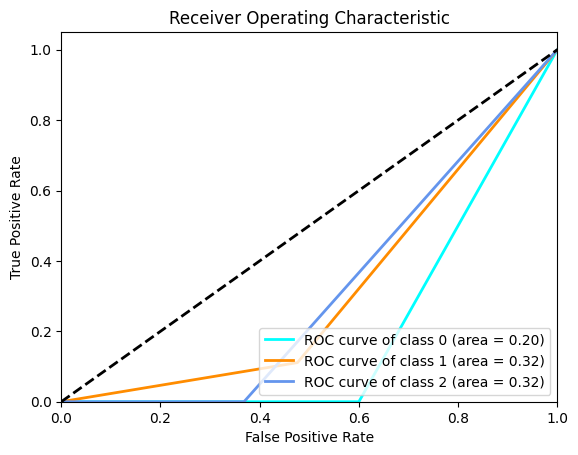

In [9]:
# Import Required Libraries
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Define your X, y, y_test, y_pred here

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
for i, color in zip(range(3), ['aqua', 'darkorange', 'cornflowerblue']):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()